In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Titanic dataset
titanic_df = pd.read_csv('/content/drive/MyDrive/Titanic_dataset/train.csv')


In [ ]:
#(i)____________________________________________________________

# Print shape of the dataset
print("Shape of Titanic dataset: ", titanic_df.shape)

# Show first ten rows
print("First ten rows:")
print(titanic_df.head(10))
print()

# Show last ten rows
print("Last ten rows:")
print(titanic_df.tail(10))
print()

Shape of Titanic dataset:  (891, 12)
First ten rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6          

In [ ]:
#(ii)____________________________________________________________

# Check for null values
null_values = titanic_df.isnull().sum()

# Print the null values count
print('Null values count in each column:')
print(null_values)
print()

Null values count in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



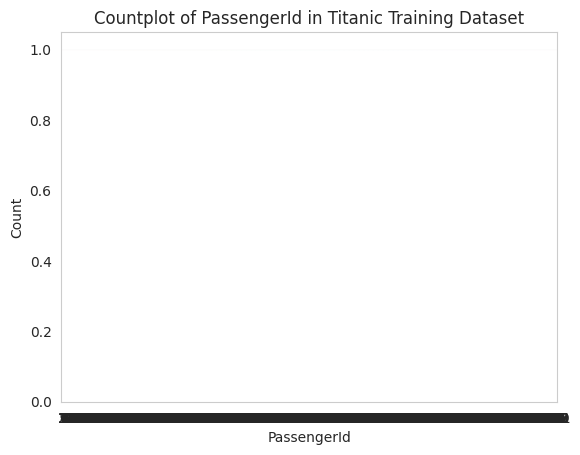

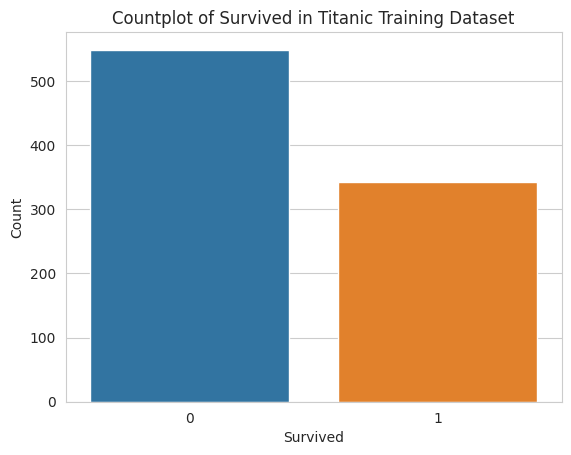

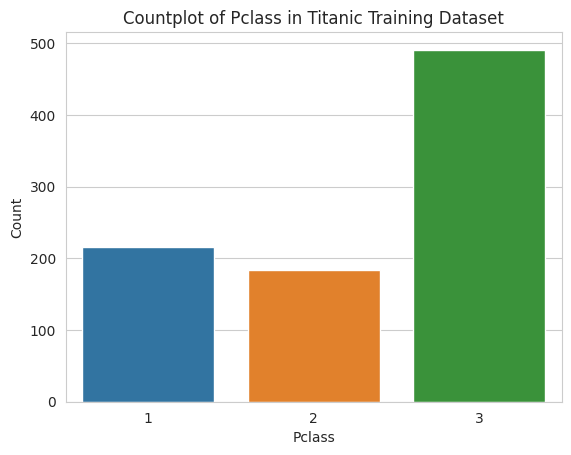

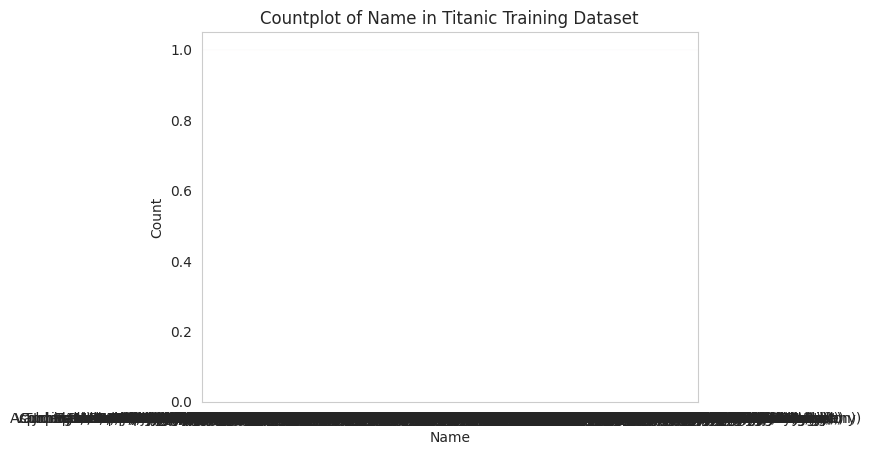

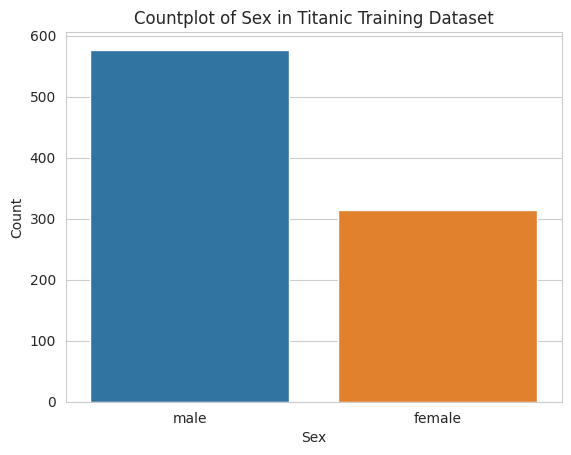

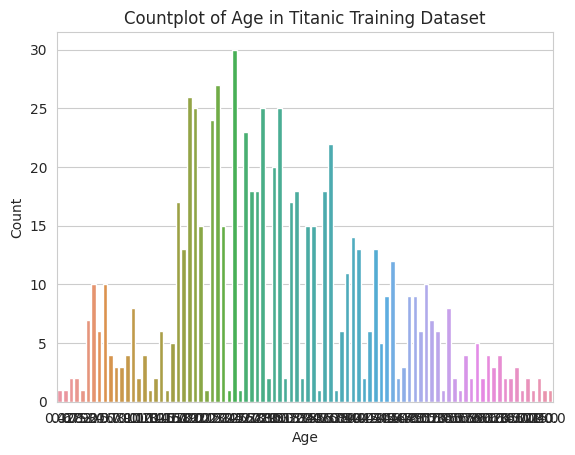

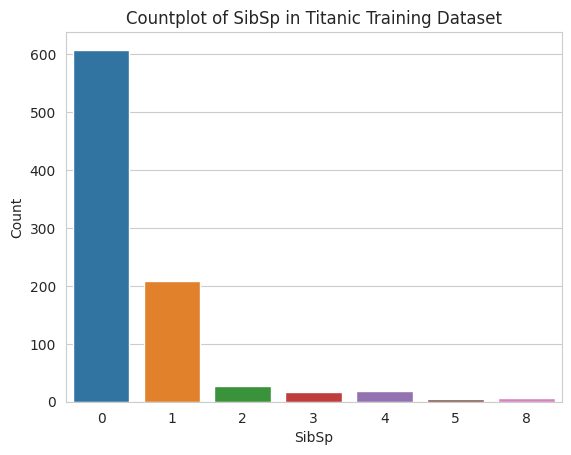

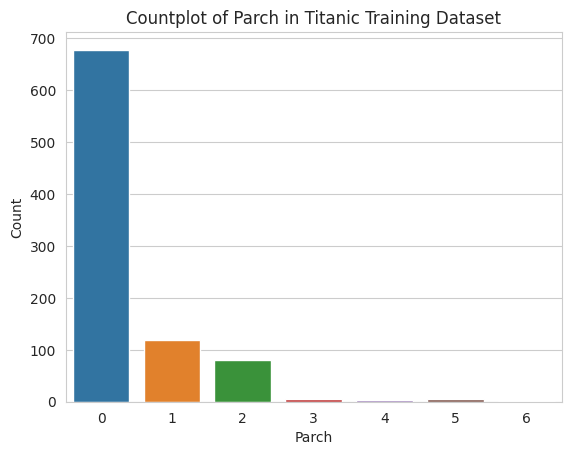

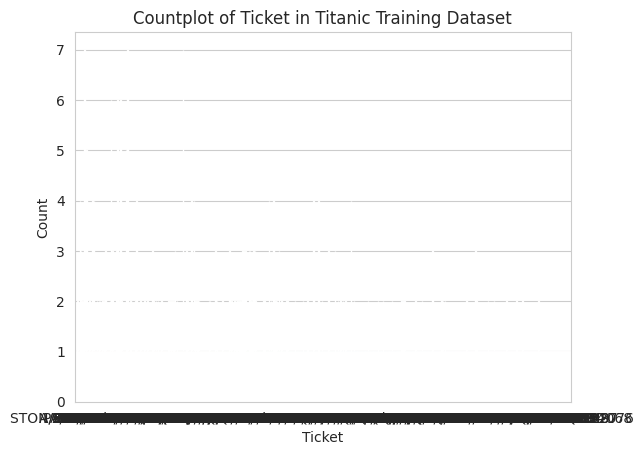

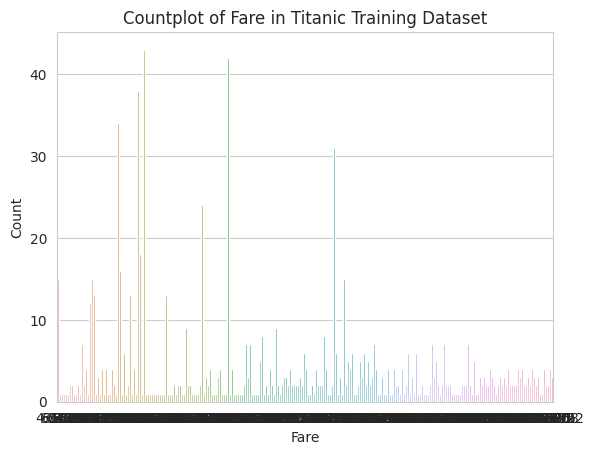

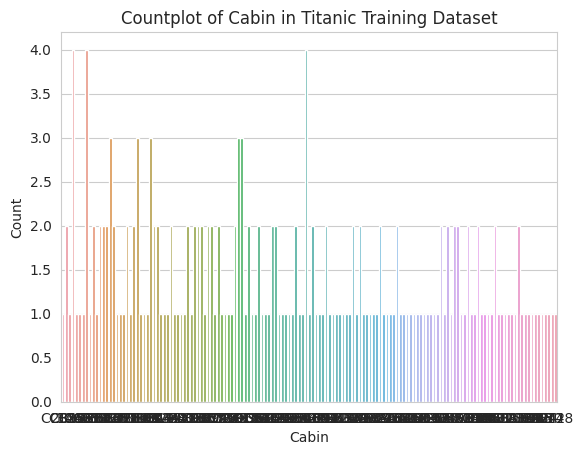

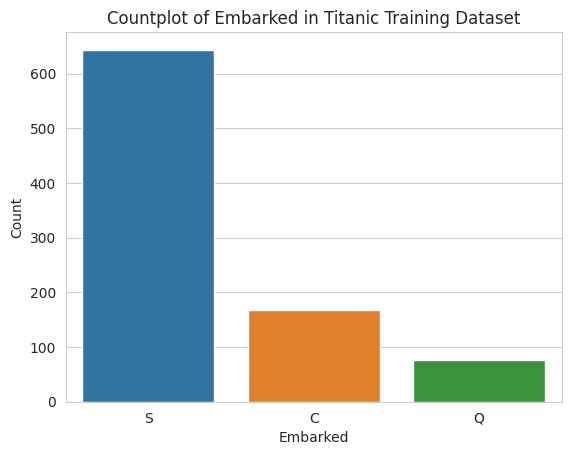

In [ ]:
# Plot the countplot for all columns
sns.set_style('whitegrid')
for col in titanic_df.columns:
    plt.figure()
    sns.countplot(x=col, data=titanic_df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Countplot of ' + col + ' in Titanic Training Dataset')

# Show the plots
plt.show()


# Comments:

 The countplot is a type of bar plot that shows the count of observations in each category.

The for loop iterates through each column in the dataset, and for each column, a new figure is created with the countplot. The x-axis of the countplot is set to the column name, and the data is set to the training dataset. The xlabel, ylabel, and title are set based on the column name, and then the plot is shown using plt.show().

This code can be useful for quickly visualizing the distribution of categorical variables in the dataset. However, it may not be as useful for continuous variables, which would require a different type of plot, such as a histogram or a scatter plot.

It's worth noting that this code will create a large number of plots if the dataset has many columns, which could make it difficult to interpret the results. In addition, the code does not handle missing values, so it's important to ensure that the dataset is clean before using this code.


In [ ]:
#(iv)____________________________________________________________

# Group by 'Sex' column and count 'Survived' column
gender_survival = titanic_df.groupby(['Sex','Survived']).Survived.count()

# Print the result
print('Number of males and females who survived:')
print(gender_survival)
print()


Number of males and females who survived:
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64



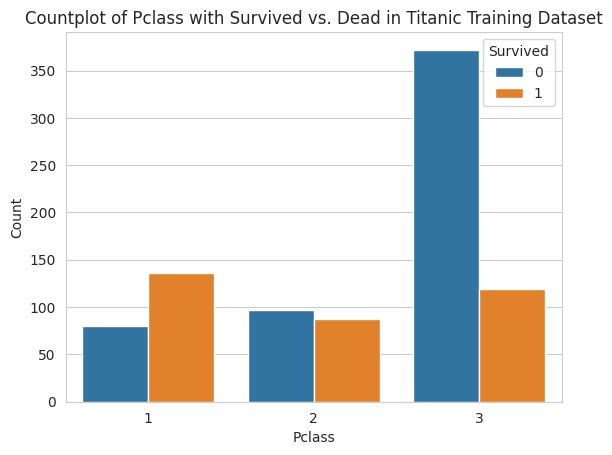

In [ ]:
#(v)____________________________________________________________

# Plot the countplot for 'Pclass' with hue as 'Survived'
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

# Set labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Countplot of Pclass with Survived vs. Dead in Titanic Training Dataset')

# Show the plot
plt.show()
print()

# Comments:

 The countplot provides a visual representation of the distribution of passengers across different passenger classes (Pclass) and their survival status (Survived vs. Dead).

 It shows the count of passengers in each class (1, 2, or 3) who survived or did not survive the Titanic disaster.
 From the plot, we can observe that passengers in Pclass 1 (first class) have a higher survival rate compared to those in Pclass 2 (second class) and Pclass 3 (third class).
 
 This suggests that passenger class (Pclass) may be a significant factor affecting the survival outcome in the Titanic disaster.
 Further analysis and exploration of other factors, such as age, gender, and embarked location, can provide additional insights into the relationship between passenger class (Pclass) and survival in the Titanic dataset.


In [ ]:
#(vi)____________________________________________________________

# Filter for rows where 'Survived' column is 1 (i.e., passengers who survived)
survived_df = titanic_df[titanic_df['Survived'] == 1]

# Find the oldest, youngest, and average age of the people who survived
oldest_age = survived_df['Age'].max()
youngest_age = survived_df['Age'].min()
average_age = survived_df['Age'].mean()

# Print the results
print("Oldest age of person who survived: {:.2f} years".format(oldest_age))
print("Youngest age of person who survived: {:.2f} years".format(youngest_age))
print("Average age of people who survived: {:.2f} years".format(average_age))
print()

Oldest age of person who survived: 80.00 years
Youngest age of person who survived: 0.42 years
Average age of people who survived: 28.34 years



In [ ]:
#(vii)____________________________________________________________

# Create a crosstab of 'Sex', 'Survived', and 'Pclass'
crosstab_df = pd.crosstab(index=titanic_df['Sex'], columns=[titanic_df['Survived'], titanic_df['Pclass']],
                          rownames=['Sex'], colnames=['Survived', 'Pclass'])

# Display the crosstab
print(crosstab_df)
print()


Survived   0            1        
Pclass     1   2    3   1   2   3
Sex                              
female     3   6   72  91  70  72
male      77  91  300  45  17  47



# Observations:

 From the crosstab, we can observe the count of males and females who survived or died in each passenger class.

 In general, we can see that the majority of females in all passenger classes (1, 2, and 3) survived, whereas the majority of males did not survive.
 Specifically, in Pclass 1, a higher proportion of females survived compared to males.

 In Pclass 2, a similar pattern is observed with more females surviving compared to males.

 In Pclass 3, although the number of males who survived is higher compared to Pclass 1 and 2, the count of females who did not survive is also significantly higher.
 
 This suggests that gender (Sex) may have played a significant role in determining survival outcomes in the Titanic disaster, especially in higher passenger classes (Pclass 1 and 2).


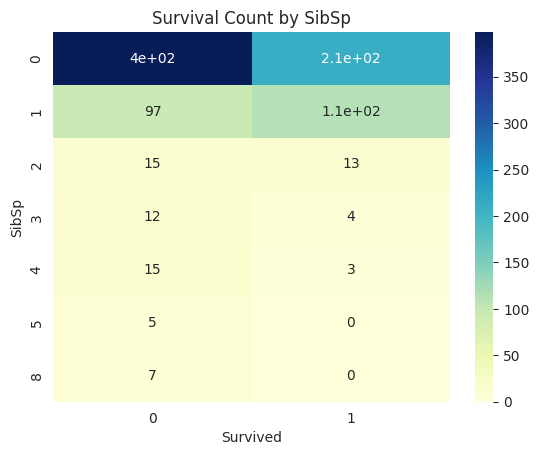

<ipython-input-12-70492dd1f121>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='SibSp', y='Survived', data=titanic_df, kind='point', ci=None)


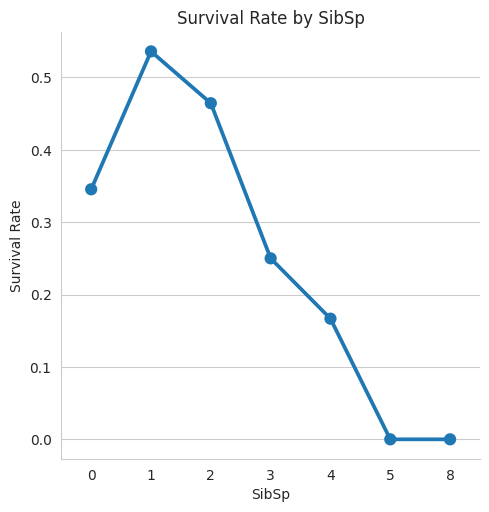

In [ ]:
#(viii)____________________________________________________________

sibsp_crosstab = pd.crosstab(index=titanic_df['SibSp'], columns=titanic_df['Survived'])

# Plot the crosstab
sns.heatmap(sibsp_crosstab, annot=True, cmap='YlGnBu')
plt.title('Survival Count by SibSp')
plt.xlabel('Survived')
plt.ylabel('SibSp')
plt.show()

# Plot catplot of 'SibSp' vs 'Survived'
sns.catplot(x='SibSp', y='Survived', data=titanic_df, kind='point', ci=None)
plt.title('Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()

# Observations:

 From the crosstab heatmap, we can observe that passengers with 0 or 1 sibling/spouse (SibSp) have a higher count of survivors compared to those with higher values of SibSp.
 
 Specifically, passengers with 0 or 1 SibSp have a higher proportion of survivors compared to passengers with 2 or more SibSp.
 The factorplot also shows a similar trend, with a higher survival rate for passengers with 0 or 1 SibSp, and a lower survival rate for passengers with 2 or more SibSp.

 This suggests that having a smaller number of siblings/spouse on board may have increased the chances of survival in the Titanic disaster.